### Predicting modal onion prices .
By modal onion prices what I understand is they are selling price /quintal (1000 kg) of onions

Data source:
https://www.kaggle.com/ravisane1/market-price-of-onion-2020 


#### The following steps will be performed as part of this project(High-Level Steps):

1. Data wrangling - dealing with missing values
2. Univariate analysis - Checking the outliers and other basic statistics including graph. Transformations if needed
3. Bivariate analysis- Performing correlation analysis and other analysis with the dependent variable including graph
4. New variable creation if any
5. Repeating steps 1 and 2 for the new variables
6. Variable selection based on multicollinearity and VIF
7. Split the datasets into train/test
8. Perform feature scaling (normalization) for train/test data
9. Running few algos -> Linear Regression, Boosting, Random forests
10. Perform cross validation with unscaled data. Scaling will be done for each fold separately (k=10)
11. Feed in new data for predictions 




In [1]:
# Importing the necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

from numpy import loadtxt

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

### Data Wrangling

In [2]:
# Reading the csv file from local machine

data=pd.read_csv("/Users/plutobot/Downloads/Onion Prices Project/Onion Prices 2020.csv")


In [3]:
# Checking the number of records 
data.count()

state           107295
district        107295
market          107295
commodity       107295
variety         107295
arrival_date    107295
min_price       107295
max_price       107295
modal_price     107295
dtype: int64

In [4]:
# Checking the data types
data.dtypes

state            object
district         object
market           object
commodity        object
variety          object
arrival_date     object
min_price         int64
max_price         int64
modal_price     float64
dtype: object

In [5]:
# Before performing data wrangling , retaining a copy of the original dataset
data1=data.copy()

In [6]:
# Creating a unique key for the records by combining state, district, market, variety
data['key']=data['state'].astype(str)+data['district'].astype(str)+data['market'].astype(str)+data['variety'].astype(str)+data['arrival_date'].astype(str)

In [7]:
# Summary stats for numeric variables
data.describe()

,min_price,max_price,modal_price
count,107295.000000,107295.000000,107295.000000
mean,1894.479715,2289.960492,2109.523217
std,1459.415839,1565.827631,1493.344338
min,0.000000,0.000000,20.000000
25%,1000.000000,1220.000000,1150.000000
50%,1400.000000,1800.000000,1600.000000
75%,2400.000000,2800.000000,2550.000000
max,18000.000000,25000.000000,22000.000000


In [8]:
# Converting modal_price to int
data['modal_price']=data['modal_price'].astype(float).astype(int)

In [9]:
# Analyzing the cat variables
data['state'].value_counts()


Uttar Pradesh        37263
Punjab               10783
Kerala                8834
West Bengal           7235
Odisha                6938
Haryana               6637
Rajasthan             4974
Maharashtra           4788
Madhya Pradesh        4333
Karnataka             3775
Gujarat               2940
Himachal Pradesh      2486
Uttrakhand            1731
Tripura               1626
Jammu and Kashmir      831
Chattisgarh            733
Telangana              507
NCT of Delhi           371
Jharkhand              302
Andhra Pradesh         127
Goa                     74
Nagaland                 7
Name: state, dtype: int64

In [10]:
data['district'].value_counts()

Kottayam        1671
Alappuzha       1563
Nashik          1473
Bulandshahar    1397
Hamirpur        1187
                ... 
Ratnagiri          2
Rayagada           2
Badwani            2
Raisen             1
Bidar              1
Name: district, Length: 315, dtype: int64

In [11]:
data['market'].value_counts()

Kayamkulam                    461
Hubli (Amaragol)              416
Palakkad                      370
Bangalore                     361
Chengannur                    346
                             ... 
Berachha                        1
Amarawati                       1
Jamanian                        1
Shimla and Kinnaur(Rampur)      1
Neemuch                         1
Name: market, Length: 905, dtype: int64

In [12]:
data['commodity'].value_counts()

Onion    107295
Name: commodity, dtype: int64

In [13]:
data['variety'].value_counts()

Other               38316
Red                 36455
Onion               14712
Local                3663
1st Sort             3490
Nasik                3449
Big                  2989
Small                1658
White                 490
Pusa-Red              436
Puna                  348
Medium                343
Bombay (U.P.)         224
Dry F.A.Q.            191
Beelary-Red           149
Pole                  126
Telagi                115
2nd Sort               76
Hybrid                 63
Bangalore-Samall        1
Bellary                 1
Name: variety, dtype: int64

In [14]:
# % spread of variety. Any variety less than 1 is combined with the category Other
data['variety'].value_counts(normalize=True)

Other               0.357109
Red                 0.339764
Onion               0.137117
Local               0.034140
1st Sort            0.032527
Nasik               0.032145
Big                 0.027858
Small               0.015453
White               0.004567
Pusa-Red            0.004064
Puna                0.003243
Medium              0.003197
Bombay (U.P.)       0.002088
Dry F.A.Q.          0.001780
Beelary-Red         0.001389
Pole                0.001174
Telagi              0.001072
2nd Sort            0.000708
Hybrid              0.000587
Bangalore-Samall    0.000009
Bellary             0.000009
Name: variety, dtype: float64

In [15]:
# Combining the varieties so that 1 digit objects are combined with Other. Also the variety onion can be combined with the category other 

x=dict.fromkeys(['Onion','Bangalore-Samall','Bellary','2nd Sort','Hybrid'],'Other')
data['variety'] = data['variety'].replace(x)

In [16]:
# Checking the % spread of variety. Any variety less than 1 is combined with
data['variety'].value_counts(normalize=True)

Other            0.495540
Red              0.339764
Local            0.034140
1st Sort         0.032527
Nasik            0.032145
Big              0.027858
Small            0.015453
White            0.004567
Pusa-Red         0.004064
Puna             0.003243
Medium           0.003197
Bombay (U.P.)    0.002088
Dry F.A.Q.       0.001780
Beelary-Red      0.001389
Pole             0.001174
Telagi           0.001072
Name: variety, dtype: float64

In [17]:
# Checking the arrival date
data['arrival_date']

0         03/01/2020
1         04/01/2020
2         06/01/2020
3         07/01/2020
4         10/01/2020
             ...    
107290    03/09/2020
107291    04/09/2020
107292    08/09/2020
107293    09/09/2020
107294    10/09/2020
Name: arrival_date, Length: 107295, dtype: object

In [18]:
# Converting the arrival date into a datetime object so that further analysis can be performed

import datetime as dt
data['arrival_date']=pd.to_datetime(data['arrival_date'])

In [19]:
data['arrival_date'].dtypes

dtype('<M8[ns]')

In [20]:
# Converting arrival date into a numeric value so that algorithms can be run
data['arrival_dateA'] = pd.to_datetime(data['arrival_date'])    
data['arrival_dateA']=data['arrival_dateA'].map(dt.datetime.toordinal)

In [21]:
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,key,arrival_dateA
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2020-03-01,1350,4390,3100,Andhra PradeshKurnoolKurnoolLocal03/01/2020,737485
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2020-04-01,1390,4400,3200,Andhra PradeshKurnoolKurnoolLocal04/01/2020,737516
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2020-06-01,1460,5150,4310,Andhra PradeshKurnoolKurnoolLocal06/01/2020,737577
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2020-07-01,2010,5200,4200,Andhra PradeshKurnoolKurnoolLocal07/01/2020,737607
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2020-10-01,1320,4050,3300,Andhra PradeshKurnoolKurnoolLocal10/01/2020,737699
...,...,...,...,...,...,...,...,...,...,...,...
107290,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,2020-03-09,2200,2300,2250,West BengalSounth 24 ParganasDiamond Harbour(S...,737493
107291,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,2020-04-09,2050,2600,2200,West BengalSounth 24 ParganasDiamond Harbour(S...,737524
107292,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,2020-08-09,2700,2875,2800,West BengalSounth 24 ParganasDiamond Harbour(S...,737646
107293,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,2020-09-09,2625,2875,2800,West BengalSounth 24 ParganasDiamond Harbour(S...,737677


In [22]:
# Removing the variable commodity because this does not have an impact

data=data.drop(columns=['commodity'])

In [23]:
data.dtypes

state                    object
district                 object
market                   object
variety                  object
arrival_date     datetime64[ns]
min_price                 int64
max_price                 int64
modal_price               int64
key                      object
arrival_dateA             int64
dtype: object

In [24]:
# Creating label encoding for the variable variety
data['varietyA']=data['variety'].astype(object).astype('category')
data['varietyA']=data['varietyA'].cat.codes

In [25]:
data['varietyA'].describe()

count    107295.000000
mean          8.898970
std           2.985479
min           0.000000
25%           8.000000
50%           8.000000
75%          12.000000
max          15.000000
Name: varietyA, dtype: float64

In [26]:
data['varietyA'].describe()

count    107295.000000
mean          8.898970
std           2.985479
min           0.000000
25%           8.000000
50%           8.000000
75%          12.000000
max          15.000000
Name: varietyA, dtype: float64

In [27]:
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price,key,arrival_dateA,varietyA
0,Andhra Pradesh,Kurnool,Kurnool,Local,2020-03-01,1350,4390,3100,Andhra PradeshKurnoolKurnoolLocal03/01/2020,737485,5
1,Andhra Pradesh,Kurnool,Kurnool,Local,2020-04-01,1390,4400,3200,Andhra PradeshKurnoolKurnoolLocal04/01/2020,737516,5
2,Andhra Pradesh,Kurnool,Kurnool,Local,2020-06-01,1460,5150,4310,Andhra PradeshKurnoolKurnoolLocal06/01/2020,737577,5
3,Andhra Pradesh,Kurnool,Kurnool,Local,2020-07-01,2010,5200,4200,Andhra PradeshKurnoolKurnoolLocal07/01/2020,737607,5
4,Andhra Pradesh,Kurnool,Kurnool,Local,2020-10-01,1320,4050,3300,Andhra PradeshKurnoolKurnoolLocal10/01/2020,737699,5


In [28]:
#creating range_price to ensure that max-min is a positive number. If it turns out to be a negative one, then those records will be removed
data['range_price']=data['max_price']-data['min_price']

In [29]:
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price,key,arrival_dateA,varietyA,range_price
0,Andhra Pradesh,Kurnool,Kurnool,Local,2020-03-01,1350,4390,3100,Andhra PradeshKurnoolKurnoolLocal03/01/2020,737485,5,3040
1,Andhra Pradesh,Kurnool,Kurnool,Local,2020-04-01,1390,4400,3200,Andhra PradeshKurnoolKurnoolLocal04/01/2020,737516,5,3010
2,Andhra Pradesh,Kurnool,Kurnool,Local,2020-06-01,1460,5150,4310,Andhra PradeshKurnoolKurnoolLocal06/01/2020,737577,5,3690
3,Andhra Pradesh,Kurnool,Kurnool,Local,2020-07-01,2010,5200,4200,Andhra PradeshKurnoolKurnoolLocal07/01/2020,737607,5,3190
4,Andhra Pradesh,Kurnool,Kurnool,Local,2020-10-01,1320,4050,3300,Andhra PradeshKurnoolKurnoolLocal10/01/2020,737699,5,2730


In [30]:
data['range_price'].describe()

count    107295.000000
mean        395.480777
std         550.755810
min       -5500.000000
25%         100.000000
50%         200.000000
75%         500.000000
max       15000.000000
Name: range_price, dtype: float64

In [31]:
data=data[data['range_price']>0]

In [32]:
data['range_price'].describe()

count    102077.000000
mean        417.512907
std         551.954698
min           1.000000
25%         100.000000
50%         200.000000
75%         500.000000
max       15000.000000
Name: range_price, dtype: float64

In [33]:
data.count()

state            102077
district         102077
market           102077
variety          102077
arrival_date     102077
min_price        102077
max_price        102077
modal_price      102077
key              102077
arrival_dateA    102077
varietyA         102077
range_price      102077
dtype: int64

In [34]:
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price,key,arrival_dateA,varietyA,range_price
0,Andhra Pradesh,Kurnool,Kurnool,Local,2020-03-01,1350,4390,3100,Andhra PradeshKurnoolKurnoolLocal03/01/2020,737485,5,3040
1,Andhra Pradesh,Kurnool,Kurnool,Local,2020-04-01,1390,4400,3200,Andhra PradeshKurnoolKurnoolLocal04/01/2020,737516,5,3010
2,Andhra Pradesh,Kurnool,Kurnool,Local,2020-06-01,1460,5150,4310,Andhra PradeshKurnoolKurnoolLocal06/01/2020,737577,5,3690
3,Andhra Pradesh,Kurnool,Kurnool,Local,2020-07-01,2010,5200,4200,Andhra PradeshKurnoolKurnoolLocal07/01/2020,737607,5,3190
4,Andhra Pradesh,Kurnool,Kurnool,Local,2020-10-01,1320,4050,3300,Andhra PradeshKurnoolKurnoolLocal10/01/2020,737699,5,2730


In [35]:
data.dtypes

state                    object
district                 object
market                   object
variety                  object
arrival_date     datetime64[ns]
min_price                 int64
max_price                 int64
modal_price               int64
key                      object
arrival_dateA             int64
varietyA                   int8
range_price               int64
dtype: object

In [36]:
# Removing the variable range_price

#data=data.drop(columns=['range_price'])

### Univariate analysis

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_price', ylabel='Density'>

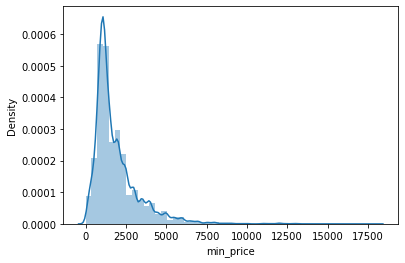

In [37]:
# Checking the distributions of numeric variables

sns.distplot(data['min_price'])

In [38]:
data['min_price'].describe()

count    102077.000000
mean       1881.541767
std        1454.707985
min           0.000000
25%        1000.000000
50%        1400.000000
75%        2360.000000
max       18000.000000
Name: min_price, dtype: float64

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_price', ylabel='Density'>

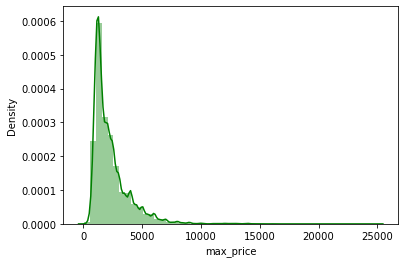

In [39]:
sns.distplot(data['max_price'],color='Green')

In [40]:
data['max_price'].describe()

count    102077.000000
mean       2299.054674
std        1566.150265
min          54.000000
25%        1240.000000
50%        1800.000000
75%        2800.000000
max       25000.000000
Name: max_price, dtype: float64

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='range_price', ylabel='Density'>

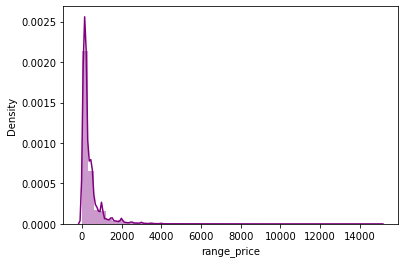

In [41]:
sns.distplot(data['range_price'],color='Purple')

In [42]:
data['range_price'].describe()

count    102077.000000
mean        417.512907
std         551.954698
min           1.000000
25%         100.000000
50%         200.000000
75%         500.000000
max       15000.000000
Name: range_price, dtype: float64

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='varietyA', ylabel='Density'>

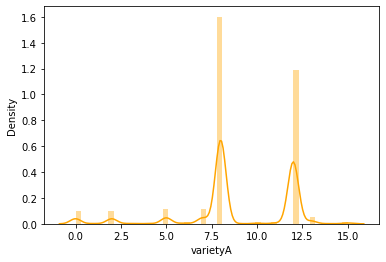

In [43]:
sns.distplot(data['varietyA'],color='Orange')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_dateA', ylabel='Density'>

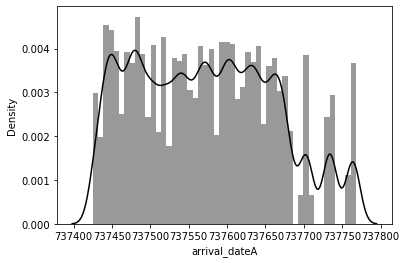

In [44]:
sns.distplot(data['arrival_dateA'],color='Black')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='modal_price', ylabel='Density'>

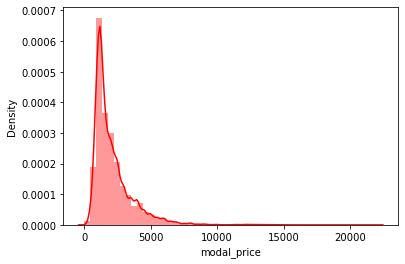

In [45]:
sns.distplot(data['modal_price'],color='Red')

In [46]:
data['modal_price'].describe()

count    102077.000000
mean       2105.465639
std        1491.585627
min          20.000000
25%        1150.000000
50%        1600.000000
75%        2550.000000
max       22000.000000
Name: modal_price, dtype: float64

### Bivariate Analysis

In [47]:
#Correlation Analysis of min_price with modal price


MinPr= pearsonr(data['min_price'],data['modal_price'])
MinSr= spearmanr(data['min_price'],data['modal_price'])
print ("Pearson Result for min_price:", MinPr)
print ("Spearman Result for min_price:", MinSr)

Pearson Result for min_price: (0.9743606928330126, 0.0)
Spearman Result for min_price: SpearmanrResult(correlation=0.9327239485109586, pvalue=0.0)


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_price', ylabel='modal_price'>

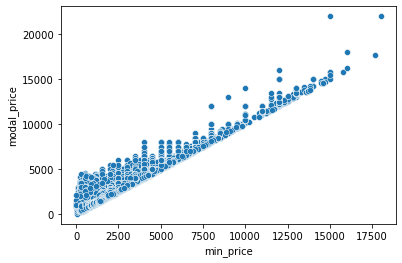

In [48]:
# scatter plot min_price and modal_price - Shows a strong positive correlation with few outliers
sns.scatterplot(data['min_price'],data['modal_price'])

In [49]:
#Correlation Analysis of max_price with modal price


MaxPr= pearsonr(data['max_price'],data['modal_price'])
MaxSr= spearmanr(data['max_price'],data['modal_price'])
print ("Pearson Result for max_price:", MaxPr)
print ("Spearman Result for max_price:", MaxSr)

Pearson Result for max_price: (0.9849256653500625, 0.0)
Spearman Result for max_price: SpearmanrResult(correlation=0.9790906402006447, pvalue=0.0)


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_price', ylabel='modal_price'>

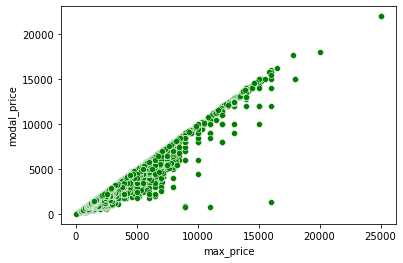

In [50]:
# scatter plot max_price and modal_price - Shows a strong positive correlation with few outliers
sns.scatterplot(data['max_price'],data['modal_price'],color='Green')

In [51]:
#Correlation Analysis of range_price with modal price


rangePr= pearsonr(data['range_price'],data['modal_price'])
rangeSr= spearmanr(data['range_price'],data['modal_price'])
print ("Pearson Result for range_price:", rangePr)
print ("Spearman Result for range_price:", rangeSr)

Pearson Result for range_price: (0.22670576425092334, 0.0)
Spearman Result for range_price: SpearmanrResult(correlation=0.2224174079117636, pvalue=0.0)


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='range_price', ylabel='modal_price'>

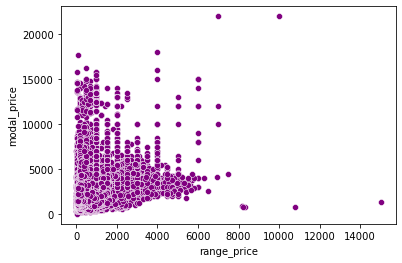

In [52]:
# scatter plot max_price and modal_price - Shows a strong positive correlation with few outliers
sns.scatterplot(data['range_price'],data['modal_price'],color='Purple')

In [53]:
#Correlation Analysis of arrival_dateA with modal price


adatePr= pearsonr(data['arrival_dateA'],data['modal_price'])
adateSr= spearmanr(data['arrival_dateA'],data['modal_price'])
print ("Pearson Result for arrival_dateA:", adatePr)
print ("Spearman Result for arrival_dateA:", adateSr)

Pearson Result for arrival_dateA: (-0.2680849015077396, 0.0)
Spearman Result for arrival_dateA: SpearmanrResult(correlation=-0.32287360555136974, pvalue=0.0)


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_dateA', ylabel='modal_price'>

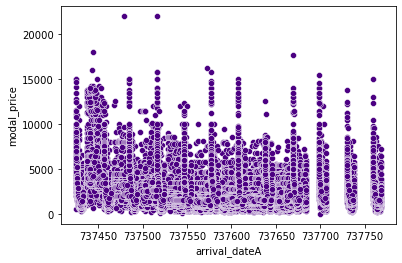

In [54]:
# scatter plot arrival_dateA and modal_price - p value is 0.
sns.scatterplot(data['arrival_dateA'],data['modal_price'],color='Indigo')

In [55]:
data.dtypes

state                    object
district                 object
market                   object
variety                  object
arrival_date     datetime64[ns]
min_price                 int64
max_price                 int64
modal_price               int64
key                      object
arrival_dateA             int64
varietyA                   int8
range_price               int64
dtype: object

In [56]:
# Rearranging data to facilitate chi-square test between varietyA and modal_price

chvarA=(data.pivot_table(index=['key'],columns='varietyA',values='modal_price').reset_index()).fillna(0.001)
chvarA=chvarA.reset_index()
chvarA=chvarA.drop(columns=['key'])

In [57]:
len(chvarA)

102077

In [58]:
chi2, p, dof, ex = chi2_contingency(chvarA, correction=False)
print ("P-value for chisquare result using variety=",p)

# because p value is 0 , this variable will be included in the model.

P-value for chisquare result using variety= 0.0


In [59]:
data.count()

state            102077
district         102077
market           102077
variety          102077
arrival_date     102077
min_price        102077
max_price        102077
modal_price      102077
key              102077
arrival_dateA    102077
varietyA         102077
range_price      102077
dtype: int64

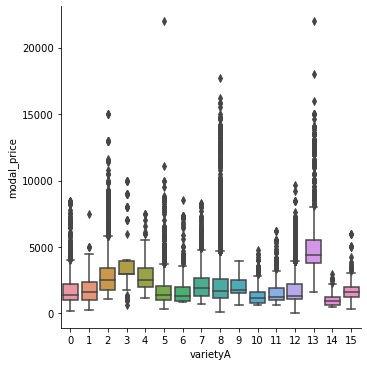

In [60]:
# This shows how modal_price is spread across varieties. Using varietyA instead of variety because it is crumbled
sns.catplot(x=data['varietyA'], y=data['modal_price'], kind='box',data=data)

In [61]:
data.dtypes

state                    object
district                 object
market                   object
variety                  object
arrival_date     datetime64[ns]
min_price                 int64
max_price                 int64
modal_price               int64
key                      object
arrival_dateA             int64
varietyA                   int8
range_price               int64
dtype: object

### Variable selection - 

This section is spilt into 2 parts. Calculating VIFs and also computing correlation for independent variables for 2 sets of variables. 

#### Part 1

In [62]:
# dataset for vif

datavif=data[['min_price','max_price','varietyA','arrival_dateA']]

In [63]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [64]:
calc_vif(datavif)

# VIF is large so we are also looking at correlation analysis of independent variables

,variables,VIF
0,min_price,21.936299
1,max_price,25.991819
2,varietyA,10.399404
3,arrival_dateA,13.364813


In [65]:
datavif.corr(method='pearson', min_periods=1)

,min_price,max_price,varietyA,arrival_dateA
min_price,1.000000,0.935865,-0.011236,-0.247695
max_price,0.935865,1.000000,-0.063219,-0.273563
varietyA,-0.011236,-0.063219,1.000000,-0.015280
arrival_dateA,-0.247695,-0.273563,-0.015280,1.000000


#### Part 2

In [66]:
# dataset for vif

datavif1=data[['range_price','varietyA','arrival_dateA']]

In [67]:
# Calculating vif based on the function created above
calc_vif(datavif1)

,variables,VIF
0,range_price,1.608200
1,varietyA,10.398696
2,arrival_dateA,11.662482


In [68]:
datavif1.corr(method='pearson', min_periods=1)


,range_price,varietyA,arrival_dateA
range_price,1.000000,-0.14977,-0.123411
varietyA,-0.149770,1.00000,-0.015280
arrival_dateA,-0.123411,-0.01528,1.000000


Because min_price and max_price have good correlation and vif is > , I would try 2 models , 1 with min_price and max_price and the other with range_price.Whichever model performs better will be chosen. Because this is a toy project, cross-validation will be run only for the selected model and not both.In order for the model to get selected, I will be choosing the following algorithms -> Linear regression, Random Forest and XG boost

### ML algorithms

In [69]:
# Splitting the dataset into train/test -> 80/20
xfull=data[['key','arrival_dateA','min_price','max_price','varietyA']]
yfull=data[['key','modal_price']]
x=xfull[['arrival_dateA','min_price','max_price','varietyA']]
y=yfull[['modal_price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
trainmean=np.mean(x_train)
trainstd=np.std(x_train)

In [71]:
# Performing feature scaling (normalization) on x_train and x_test

x_train=(x_train-trainmean)/(trainstd)
x_test=(x_test-trainmean)/(trainstd)

### Linear Regression -> Model 1

In [72]:
model=LinearRegression().fit(x_train,y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
# Calculate the R2 value
R_squared=model.score(x_test,y_test)*100
print("Coefficient of determination using linear regression", R_squared)

Coefficient of determination using linear regression 99.30543335717617


### Linear Regression -> Model 2

In [73]:
# Splitting the dataset into train/test -> 80/20
xfull=data[['key','arrival_dateA','range_price','varietyA']]
yfull=data[['key','modal_price']]
xa=xfull[['arrival_dateA','range_price','varietyA']]
ya=yfull[['modal_price']]
x_train1,x_test1,y_train1,y_test1=train_test_split(xa,ya,test_size=0.2,random_state=0)
modelA=LinearRegression().fit(x_train1,y_train1)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
# Calculate the R2 value
R_squared=modelA.score(x_test1,y_test1)*100
print("Coefficient of determination using linear regression", R_squared)


Coefficient of determination using linear regression 10.888808355720926


#### Because the performance of the model 2 is bad r squred is 10% when we use range_price, this model is discarded. The other algorithms will be run using min_price and max_price

### XG Boost Regression

In [74]:
model2=GradientBoostingRegressor().fit(x_train,y_train)

# Calculate the R2 value
R_squared=model2.score(x_test,y_test)*100
print("Coefficient of determination using random forest regression", R_squared)

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coefficient of determination using random forest regression 99.33944625414783


### Random Forest Regression

In [75]:
model1=RandomForestRegressor().fit(x_train,y_train)

<ipython-input-75-7c0988dfd863>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1=RandomForestRegressor().fit(x_train,y_train)


In [76]:
# Calculate the R2 value
R_squared=model1.score(x_test,y_test)*100
print("Coefficient of determination using random forest regression", R_squared)

Coefficient of determination using random forest regression 99.36721707778804


Text(0, 0.5, 'Predicted Y')

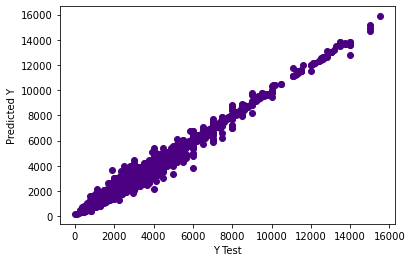

In [77]:
# Predicting the y_test values and comparing the actual vs predicted. 
# Because random forest has a better accuracy score, prediting the results only for this model as a part of toy project
y_pred=model1.predict(x_test)  
y_pred=pd.DataFrame(y_pred)
y_pred.columns=['predicted_modal_price']
plt.scatter(x = y_test, y =y_pred,color='indigo')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


### Cross-validation using Random Forest Regressor


In [78]:
# evaluating the algorithm and specify the k-size
num_folds=10

# Fixing the random seed- must use the same seed value so that the subsets can be obtained

seed =7

# Split the whole data set into folds
kfold=KFold(n_splits=num_folds)

In [79]:

# Training the model and run K-Fold cross validation to validate/evaluate the model

results=cross_val_score(model1,x,y, cv=kfold)
# print out the evaluation results- the average of all the results obtained from the k-fold cross -validation- 
#MSE is usually positive but sckit reports as neg


print(results)

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_va

[0.98374704 0.99367364 0.9905882  0.97276607 0.98499365 0.9942694
 0.99930559 0.99549578 0.99904149 0.99676109]


### Predict new observations using random forest regressor

Min_price and max_price are inflated by 5.7% (based on inflation rate for India and predictions for random dates in 2021)

In [80]:
pred=pd.read_csv("/Users/plutobot/Downloads/Onion Prices Project/predictions.csv")

In [81]:
pred.dtypes

state            object
district         object
market           object
variety          object
arrival_date     object
min_price       float64
max_price       float64
varietyA          int64
dtype: object

In [82]:
# Converting arrival date into a numeric value so that algorithms can be run
pred['arrival_dateA'] = pd.to_datetime(pred['arrival_date'])    
pred['arrival_dateA']=pred['arrival_dateA'].map(dt.datetime.toordinal)

In [83]:
pred.dtypes

state             object
district          object
market            object
variety           object
arrival_date      object
min_price        float64
max_price        float64
varietyA           int64
arrival_dateA      int64
dtype: object

In [84]:
newdata=pred[['arrival_dateA','min_price','max_price','varietyA']]

In [85]:
len(newdata)

654

In [86]:
newdata.head()

,arrival_dateA,min_price,max_price,varietyA
0,737791,6870.500,7399.000,8
1,737793,4228.000,6342.000,8
2,737795,3699.500,8984.500,8
3,737797,1109.850,5475.260,12
4,737799,2912.035,3546.235,15


In [87]:
# Because train and test were normalize, we need to normalize the new data as well
newnormdata=(newdata-trainmean)/(trainstd)
newdatapred=model1.predict(newnormdata)  
newdatapred=pd.DataFrame(newdatapred)
newdatapred.columns=['Predicted_Modal_Price']

In [88]:
newvalidateddataset=pd.concat([newdata,newdatapred],axis=1)

In [89]:
newvalidateddataset

,arrival_dateA,min_price,max_price,varietyA,Predicted_Modal_Price
0,737791,6870.500,7399.000,8,6954.500000
1,737793,4228.000,6342.000,8,5542.030000
2,737795,3699.500,8984.500,8,5742.000000
3,737797,1109.850,5475.260,12,3849.746667
4,737799,2912.035,3546.235,15,3133.070000
...,...,...,...,...,...
649,737920,4439.400,4650.800,7,4532.695000
650,737922,4122.300,4280.850,8,4185.966667
651,737924,4122.300,4439.400,8,4252.038095
652,737926,3171.000,5285.000,8,4355.766667
